In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')


In [59]:
df=pd.read_csv('ObesityDataSet1.csv')

In [60]:
# menampilkan 5 data teratas
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [61]:
# melihat dimensi data
df.shape

(1055, 17)

In [62]:
# identifikasi kolom yang ada di dataset
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

Terdapat missing value pada kolom CAEC, TUE

In [64]:
# ringkasan statistik untuk kolom numerik
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000
mean,1.703175,86.674521,2.422701,2.719649,2.018114,1.033118,0.676977
std,0.095162,26.213231,0.529695,0.749590,0.613095,0.850566,0.603165
min,1.460000,39.370000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,65.135000,2.000000,2.765000,1.620000,0.160000,0.003250
50%,1.700000,83.150000,2.400000,3.000000,2.000000,1.000000,0.672500
75%,1.770000,107.125000,3.000000,3.000000,2.500000,1.730000,1.000000
max,1.980000,160.640000,3.000000,4.000000,3.000000,3.000000,2.000000


In [65]:
# ringkasan statistik untuk kolom yang bertipe object
df.describe(include = "object")

,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,1055,1055,1055,1055,1029,1055,1055,1055,1055,1055
unique,2,46,2,2,4,2,2,3,5,7
top,Male,26,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,536,108,864,931,871,1033,1014,705,785,175


In [66]:
df['Gender'].value_counts()

,count
Gender,
Male,536
Female,519


In [67]:
df['Age'].value_counts()

,count
Age,
26,108
18,101
21,101
23,97
22,87
19,87
20,79
24,53
25,46


In [68]:
df['Age'] = df['Age'].astype(str).str.replace(' years', '', regex=False)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [69]:
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
yes,864
no,191


In [70]:
df['FAVC'].value_counts()

,count
FAVC,
yes,931
no,124


In [71]:
df['CAEC'].value_counts()

,count
CAEC,
Sometimes,871
Frequently,112
Always,24
no,22


In [72]:
df['SMOKE'].value_counts()

,count
SMOKE,
no,1033
yes,22


In [73]:
df['SCC'].value_counts()

,count
SCC,
no,1014
yes,41


In [74]:
df['CALC'].value_counts()

,count
CALC,
Sometimes,705
no,311
Frequently,39


In [75]:
df['MTRANS'].value_counts()

,count
MTRANS,
Public_Transportation,785
Automobile,238
Walking,26
Bike,3
Motorbike,3


In [76]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,175
Obesity_Type_III,162
Obesity_Type_II,148
Overweight_Level_I,145
Overweight_Level_II,145
Normal_Weight,144
Insufficient_Weight,136


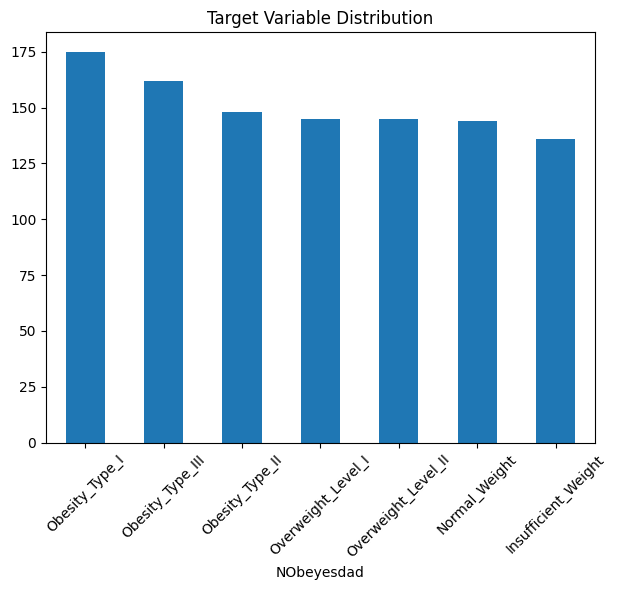

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Target Variable Distribution')
plt.tight_layout()


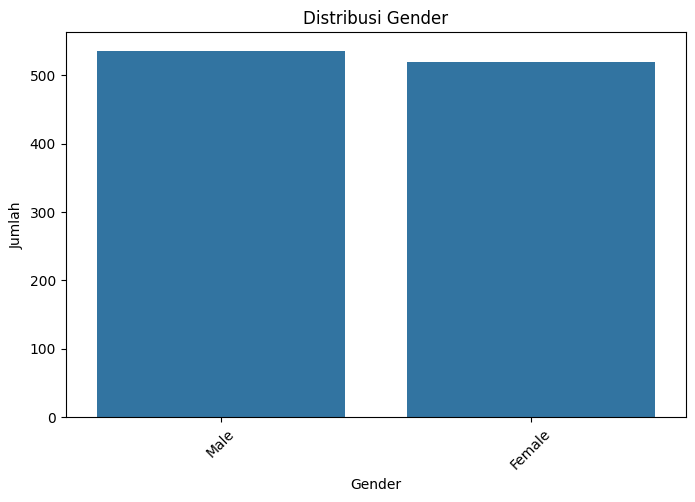

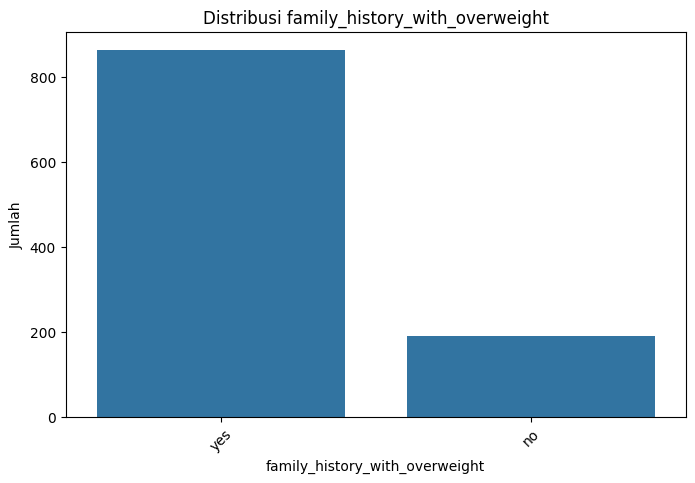

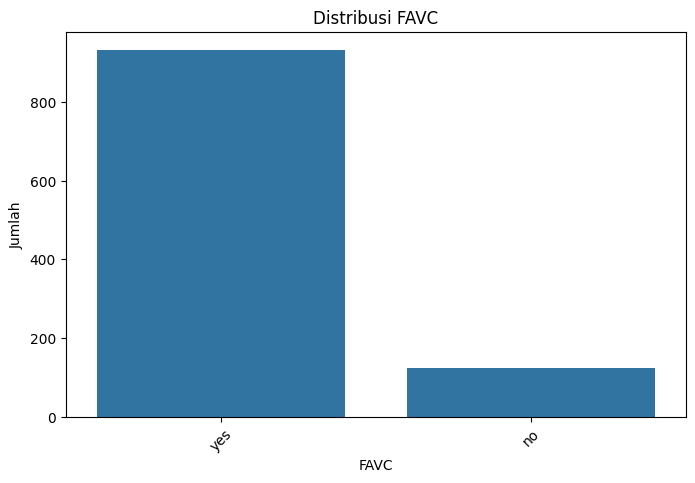

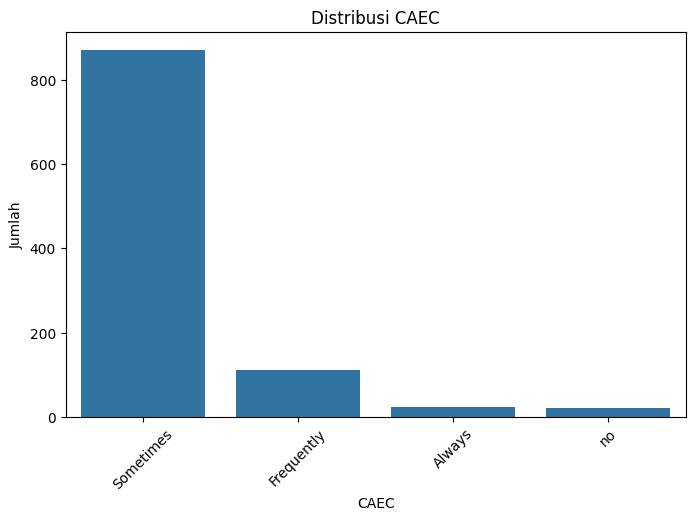

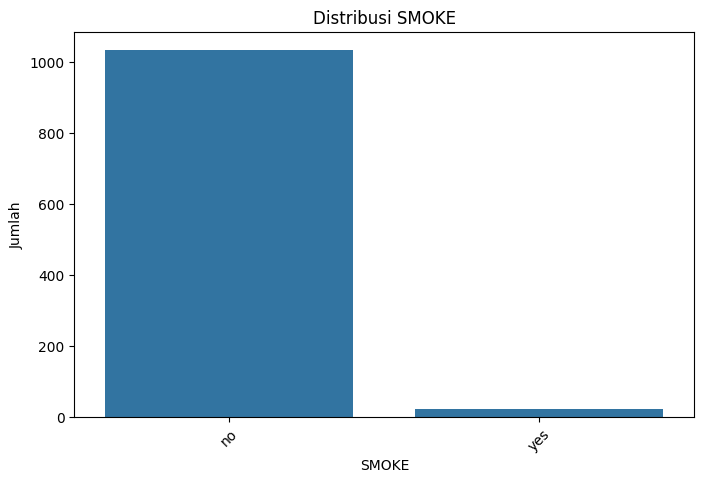

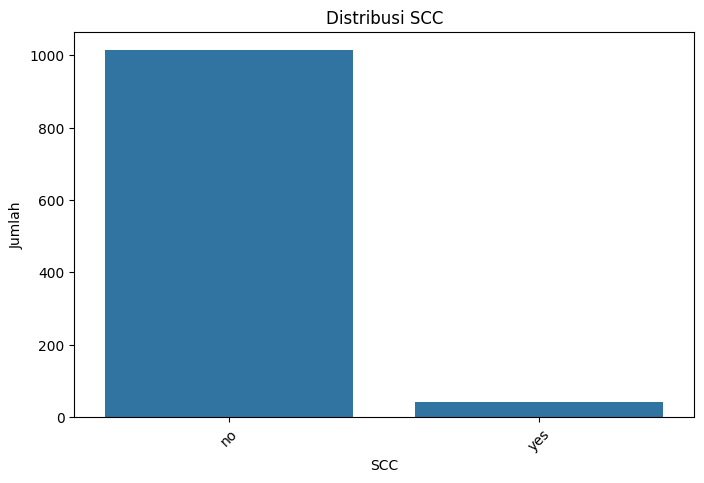

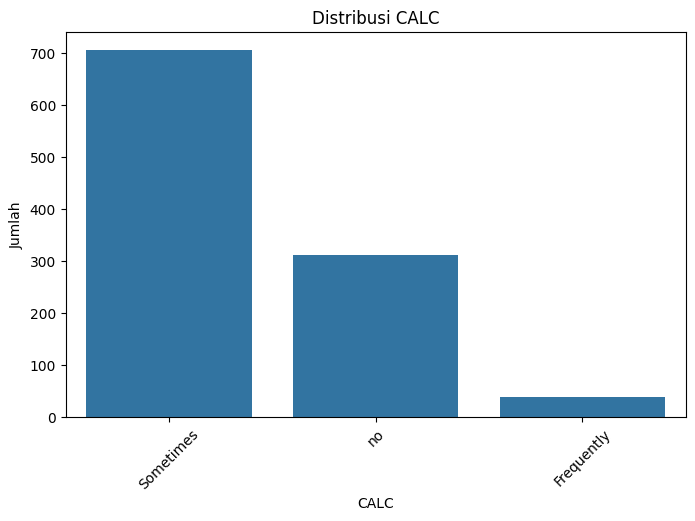

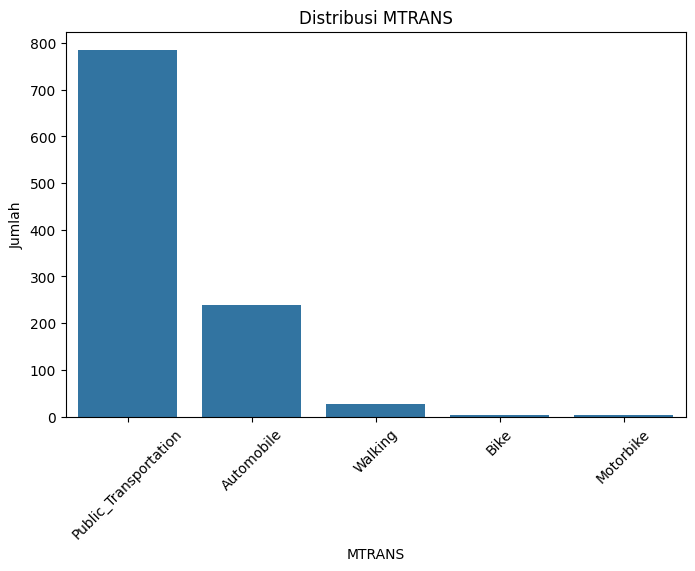

In [78]:
cat_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                       'SMOKE', 'SCC', 'CALC', 'MTRANS']

for col in cat_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

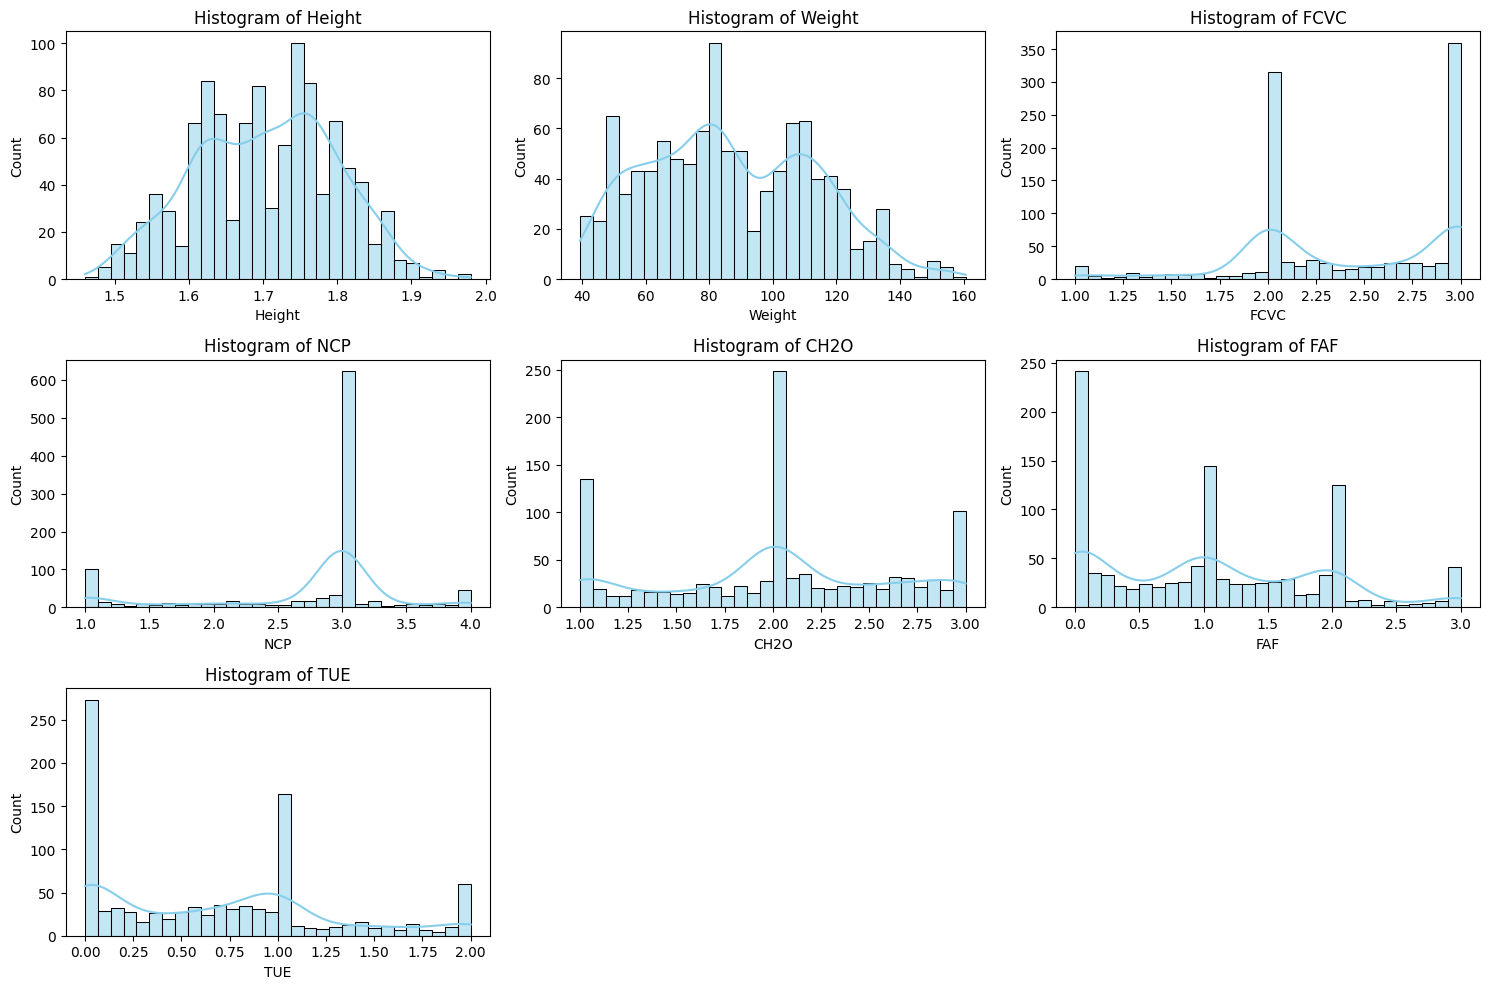

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# historgram untuk melihat distribusi data numerik (skewness, outlier, bentuk distribusi)
num_columns = ['Height',	'Weight',	'FCVC',	'NCP',	'CH2O',	'FAF',	'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

- Height (Tinggi Badan)
  Distribusi cukup simetris, mendekati normal distribution

- Weight (Berat Badan)
  Agak right-skewed (positively skewed) -> ada sebagian kecil data dengan berat sangat tinggi

- FCVC (Frekuensi Konsumsi Sayur)

  Distribusi cenderung left-skewed (negatively skewed)


- NCP (Jumlah Makan per Hari)

  Distribusi left-skewed

- CH2O (Konsumsi Air Putih)

  paling banyak di angka 2, dan cukup banyak di 1 dan 3

  Distribusi tampak agak simetris

- FAF (Frekuensi Aktivitas Fisik)

  Banyak responden tidak berolahraga sama sekali (0)

  Distribusi sangat right-skewed

- TUE (Waktu Menggunakan Perangkat Teknologi)

  Banyak nilai di 0 dan 1
  Distribusi sangat right-skewed

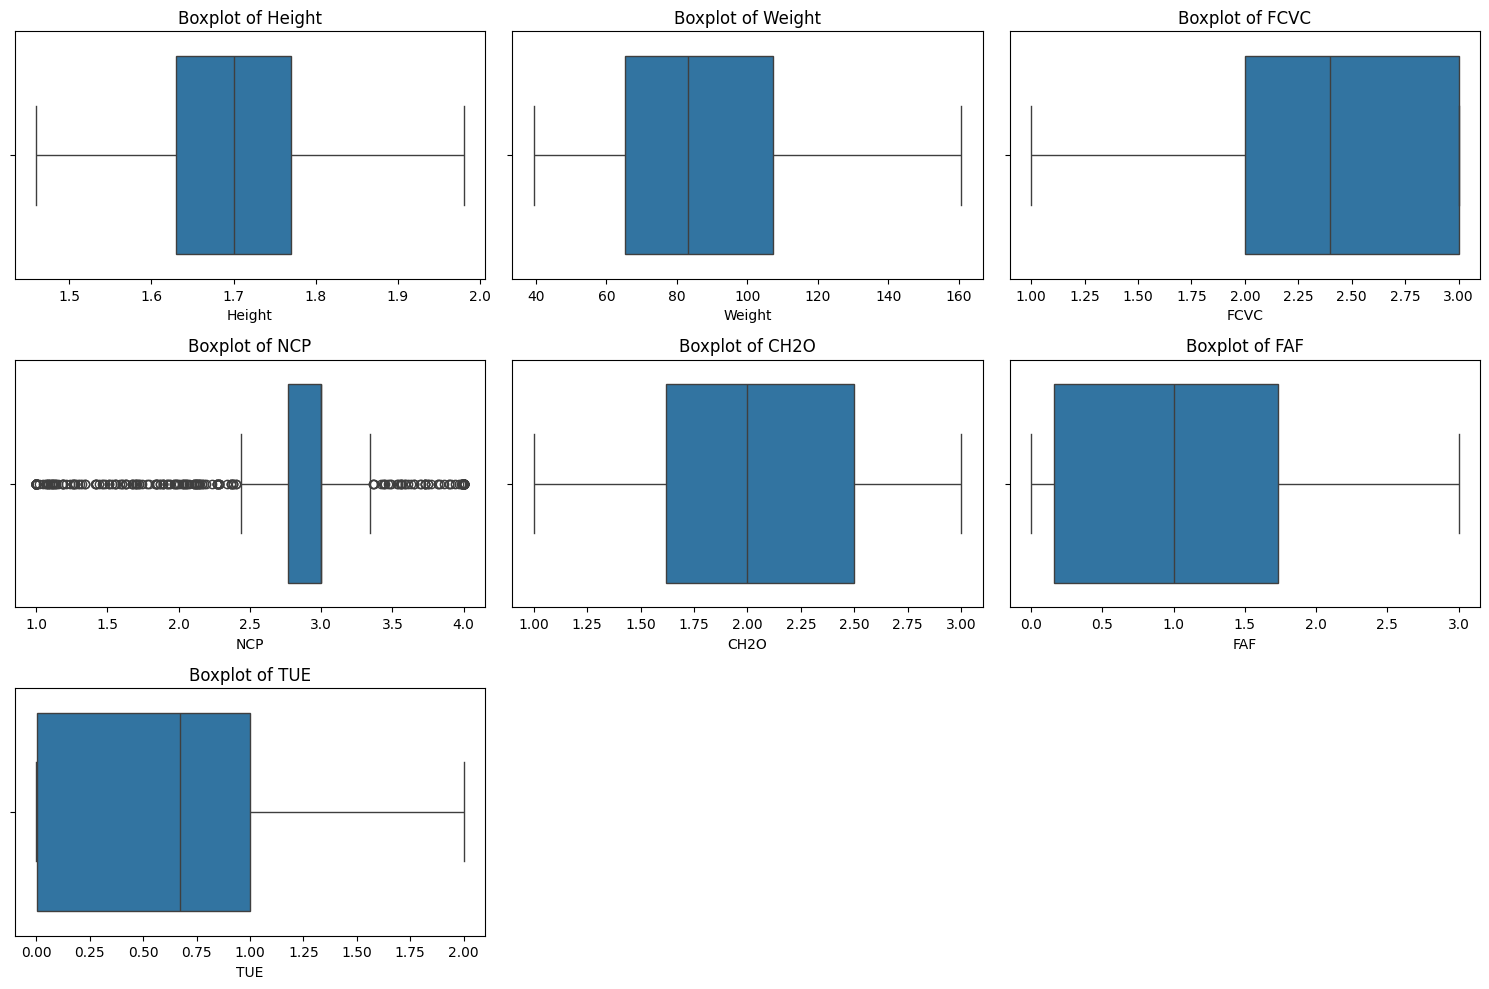

In [80]:
# boxplot untuk deteksi outlier dan penyebaran data
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Split Data**

In [81]:
input_df = df.drop('NObeyesdad', axis=1)
output_df = df['NObeyesdad']
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=42, stratify=output_df)

In [82]:
# Identifikasi kolom berdasarkan tipe
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
ordinal_features = ['CAEC', 'CALC']
nominal_features = ['MTRANS']


In [83]:
from sklearn.preprocessing import RobustScaler
# Pipeline untuk fitur numerik
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Pipeline untuk fitur binary -> yes/no, male/female
binary_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Pipeline untuk fitur ordinal -> yang memiliki urutan
ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
        categories=[
            ['no', 'Sometimes', 'Frequently', 'Always'],  # CAEC
            ['no', 'Sometimes', 'Frequently']  # CALC
        ],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Pipeline untuk fitur nominal (One-Hot Encoding) -> kategori tanpa urutan
nominal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

In [84]:
# Gabungkan semua preprocessing
preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('binary', binary_transformer, binary_features),
    ('ordinal', ordinal_transformer, ordinal_features),
    ('nominal', nominal_transformer, nominal_features)
])


In [85]:
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)


In [86]:
# Create Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor), # preprocessing (imputasi, scaling, encoding)
    ('classifier', RandomForestClassifier(random_state=42)) # model rf
])

# Hyperparameter tuning untuk Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], # banyak pohon
    'classifier__max_depth': [10, 20, None], # kedalaman tiap pohon
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'] # banyak fitur yang dipakai untuk split
}

print("=== TRAINING RANDOM FOREST MODEL ===")

# Grid Search untuk Random Forest
rf_grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    scoring='f1_macro', # biar adil untuk semua kelas
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(x_train, y_train_encoded)

print(f"\nBest parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_:.4f}")


=== TRAINING RANDOM FOREST MODEL ===
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation score: 0.9284


In [87]:
# Evaluasi Random Forest
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test_encoded, y_pred_rf)
rf_f1 = f1_score(y_test_encoded, y_pred_rf, average='macro')

print(f"\n=== RANDOM FOREST RESULTS ===")
print(f"Test Accuracy: {rf_accuracy:.4f}")
print(f"Test F1-Macro: {rf_f1:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_rf, target_names= target_encoder.classes_))



=== RANDOM FOREST RESULTS ===
Test Accuracy: 0.9526
Test F1-Macro: 0.9502

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        27
      Normal_Weight       0.90      0.93      0.92        29
     Obesity_Type_I       0.97      1.00      0.99        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32
 Overweight_Level_I       0.96      0.86      0.91        29
Overweight_Level_II       0.89      0.86      0.88        29

           accuracy                           0.95       211
          macro avg       0.95      0.95      0.95       211
       weighted avg       0.95      0.95      0.95       211



Model stabil di semua kelas, bahkan di kelas yang sulit di predict seperti Overweight_Level_I & Overweight_Level_II, performanya tetap di atas 85%, meskipun model kadang masih salah mengenali contoh dari kedua kelas

F1-macro tinggi -> kesetaraan performa antar kelas, tidak bias ke kelas mayoritas



In [88]:
# Create XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        eval_metric='mlogloss',
        random_state=42
    ))
])

In [89]:
# Hyperparameter tuning
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__max_depth': [6, 9],
    'classifier__subsample': [0.8, 1.0]
}

print("\n=== TRAINING XGBOOST MODEL ===")

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_param_grid,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

# Fit model
try:
    xgb_grid_search.fit(x_train, y_train_encoded)

    print(f"\nBest parameters for XGBoost: {xgb_grid_search.best_params_}")
    print(f"Best cross-validation score: {xgb_grid_search.best_score_:.4f}")

    # Evaluasi
    best_xgb_model = xgb_grid_search.best_estimator_
    y_pred_xgb = best_xgb_model.predict(x_test)
    y_pred_xgb_decoded = target_encoder.inverse_transform(y_pred_xgb)

    xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
    xgb_f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')

    print(f"\n=== XGBOOST RESULTS ===")
    print(f"Test Accuracy: {xgb_accuracy:.4f}")
    print(f"Test F1-Macro: {xgb_f1:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred_xgb, target_names= target_encoder.classes_))

except Exception as e:
    print(f"Error during XGBoost training: {str(e)}")


=== TRAINING XGBOOST MODEL ===
Melakukan Grid Search untuk XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best cross-validation score: 0.9339

=== XGBOOST RESULTS ===
Test Accuracy: 0.9621
Test F1-Macro: 0.9608

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        27
      Normal_Weight       0.96      0.86      0.91        29
     Obesity_Type_I       0.97      0.97      0.97        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32
 Overweight_Level_I       0.90      0.97      0.93        29
Overweight_Level_II       1.00      0.93      0.96        29

           accuracy                           0.96       211
          macro avg       0.96  

XGboost berhasil mengklasifikasikan semua kategori berat badan dengan sangat akurat dan seimbang. Semua metrik di atas 0.90, bahkan beberapa kategori (Obesity_Type_II, Obesity_Type_III) PERFECT -> precision, recall, f1 = 1

**MODEL TERBAIK**

XGBoost dipilih sebagai model terbaik dalam prediksi status obesitas karena memberikan performa yang unggul secara keseluruhan dibandingkan Random Forest.

Alasan :
- Akurasi (96.21%) dan F1-Macro (96.08%) lebih tinggi


- Performa yang konsisten di semua kelas, termasuk kelas-kelas yang biasanya sulit diklasifikasikan dengan tepat.

- Kelas Overweight_Level_I dan Overweight_Level_II diprediksi lebih baik dibandingkan Random Forest, menunjukkan bahwa model mampu menangkap pola data yang lebih kompleks.

- Prediksi sempurna (F1 = 1.00) pada pada kelas Obesity_Type_II dan Obesity_Type_III


-> Random Forest juga menunjukkan performa yang sangat baik, dengan F1-Score yang tinggi pada sebagian besar kelas, dan sedikit unggul pada kelas seperti Obesity_Type_I. Namun, karena XGBoost unggul secara metrik keseluruhan dan lebih baik dalam menangani kelas sulit, maka XGBoost dipilih sebagai model yang paling optimal untuk digunakan.




In [90]:
from google.colab import drive
import pickle
import os

# 1. Mount Google Drive
drive.mount('/content/drive')
model_folder = '/content/drive/MyDrive/UAS_MD/'
os.makedirs(model_folder, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# save model terbaik
with open(model_folder + 'best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)
print("Model xgb + pipeline berhasil disimpan ke 'best_random_forest_model.pkl'")


# save target encoder ->  untuk convert balik ke label asli
with open(model_folder + 'target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)
print("Target encoder berhasil disimpan ke 'target_encoder.pkl'")

# save preprocessor secara terpisah (backup)
with open(model_folder +'preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print("Preprocessor berhasil disimpan ke 'preprocessor.pkl'")

# save individual transformers (extra backup)
transformers_dict = {
    'numeric_transformer': numeric_transformer,
    'binary_transformer': binary_transformer,
    'ordinal_transformer': ordinal_transformer,
    'nominal_transformer': nominal_transformer
}

with open(model_folder +'transformers.pkl', 'wb') as f:
    pickle.dump(transformers_dict, f)
print("All transformers berhasil disimpan ke 'transformers.pkl'")

# save feature info dan metadata
feature_info = {
    'numeric_features': numeric_features,
    'binary_features': binary_features,
    'ordinal_features': ordinal_features,
    'nominal_features': nominal_features,
    'target_classes': target_encoder.classes_.tolist(),
    'model_type': 'RandomForestClassifier',
    'preprocessing_steps': [
        'SimpleImputer + RobustScaler for numeric',
        'SimpleImputer + OrdinalEncoder for binary',
        'SimpleImputer + OrdinalEncoder for ordinal',
        'SimpleImputer + OneHotEncoder for nominal'
    ]
}

with open(model_folder +'model_feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)
print("Feature info berhasil disimpan ke 'model_feature_info.pkl'")


Model xgb + pipeline berhasil disimpan ke 'best_random_forest_model.pkl'
Target encoder berhasil disimpan ke 'target_encoder.pkl'
Preprocessor berhasil disimpan ke 'preprocessor.pkl'
All transformers berhasil disimpan ke 'transformers.pkl'
Feature info berhasil disimpan ke 'model_feature_info.pkl'
